In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
from collections import namedtuple
import matplotlib.patches as patches
import networkx as nx

In [90]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

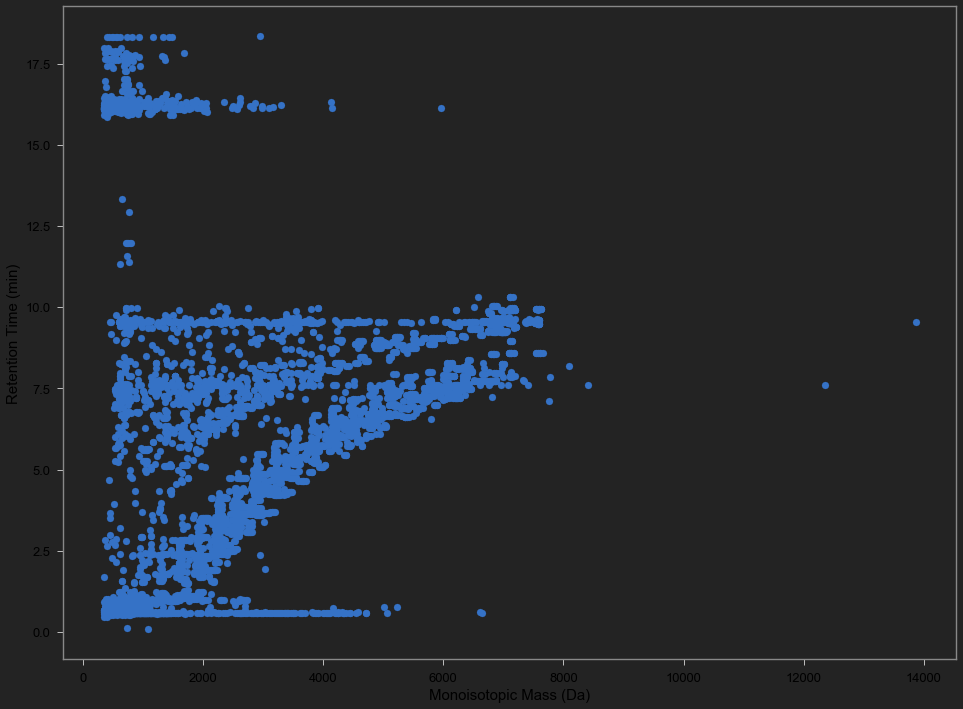

In [69]:
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/19-Table 1.csv')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/30-Table 1.csv')
# df = pd.read_csv('/Users/bryan/Studio/lcmsseq/examples/compounds.csv', skiprows=2)
df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/5mix.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/Ning1024/2mix_180521s14_100.xls')
# df = pd.read_csv('/Users/bryan/Documents/SeqDataSets/Ning1024/12mixtures/12mix.csv')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724_std.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/oligosdegradsample2-1.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_degradated_20to40_component_only.xlsx')
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_deg.xlsx')
# df = thermo_df(df)
# df = df[df.Mass < 20000]
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/032919s07.xls')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/111418s05.xls')
# df = pd.read_excel('/Users/bryan/Documents/SeqDataSets/PaperData/ACS/100918s06.xls')
df.shape
plot_zone(df)

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

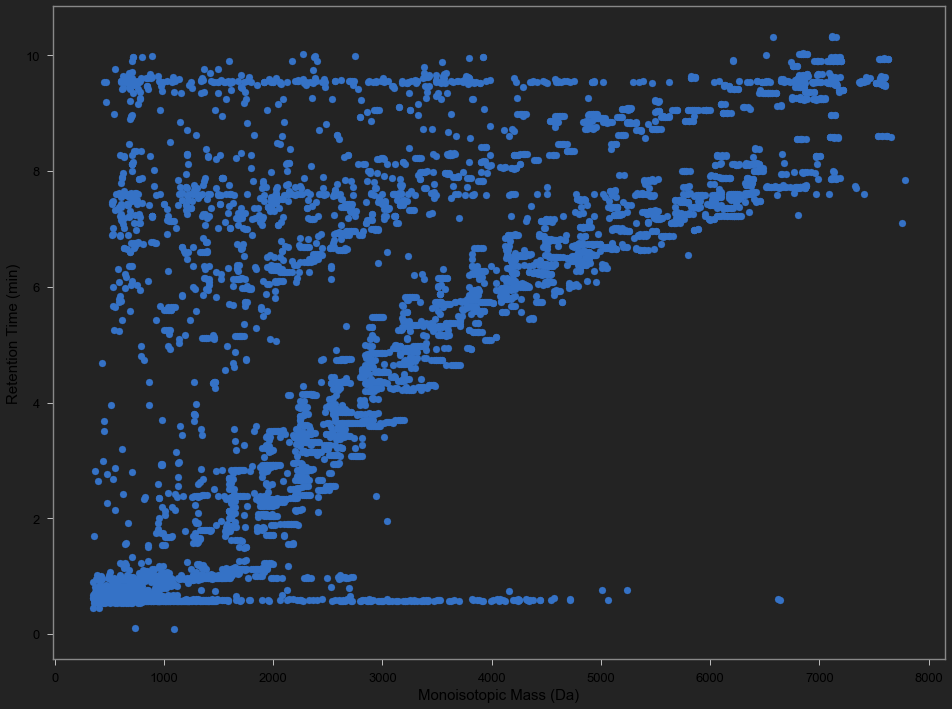

In [70]:
df_sample = df[(df.Mass < 8000) & (df.RT < 11)]
plot_zone(df_sample)

In [11]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

In [12]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(18, 26)

In [13]:
# df_hi = df_chosen
df_lo = df_chosen

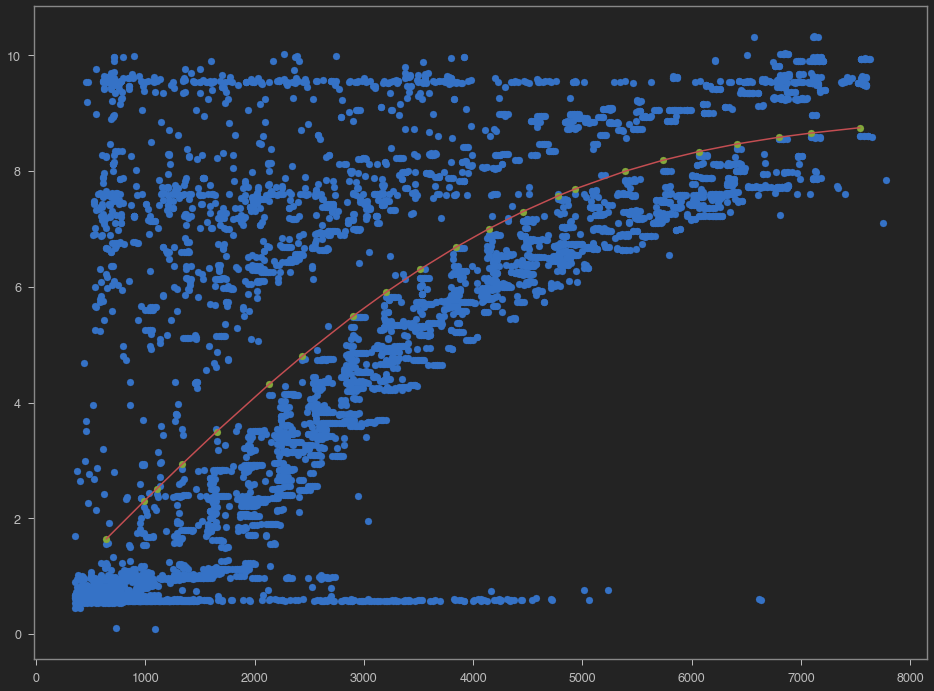

In [10]:
x = df_hi.Mass
y = df_hi.RT
z = np.polyfit(x, y, 4)
def f_hi2(x):
    return z[0] * x**4 + z[1]*x**3 + z[2]*x**2 + z[3]*x + z[4] + 0.1
y = f_hi2(x)
plt.figure(figsize=(16, 12))
plt.scatter(df_sample.Mass, df_sample.RT)
plt.plot(x, y, "r-")

plt.scatter(x, y)
plt.show()

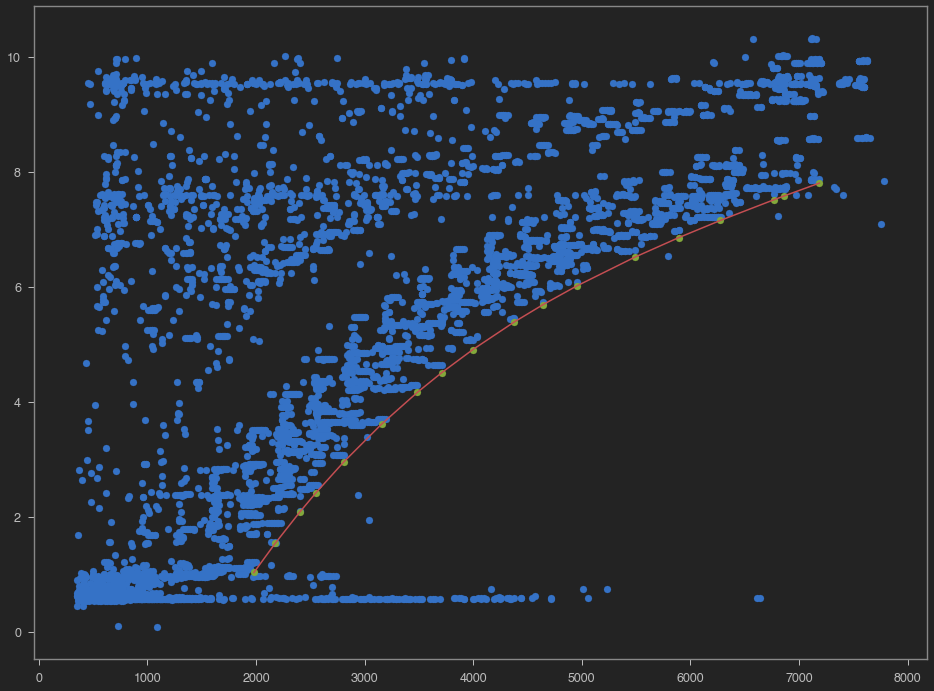

In [16]:
x = df_lo.Mass
y = df_lo.RT
z_lo = np.polyfit(x, y, 4)
def f_lo2(x):
    return z_lo[0] * x**4 + z_lo[1]*x**3 + z_lo[2]*x**2 + z_lo[3]*x + z_lo[4] - 0.1
#     return z_lo[0] * x**3 + z_lo[1]*x**2 + z_lo[2]*x + z_lo[3]
y = f_lo2(x)
plt.figure(figsize=(16, 12))
plt.plot(x, y, "r-")
plt.scatter(df_sample.Mass, df_sample.RT)
plt.scatter(x, y)
plt.show()

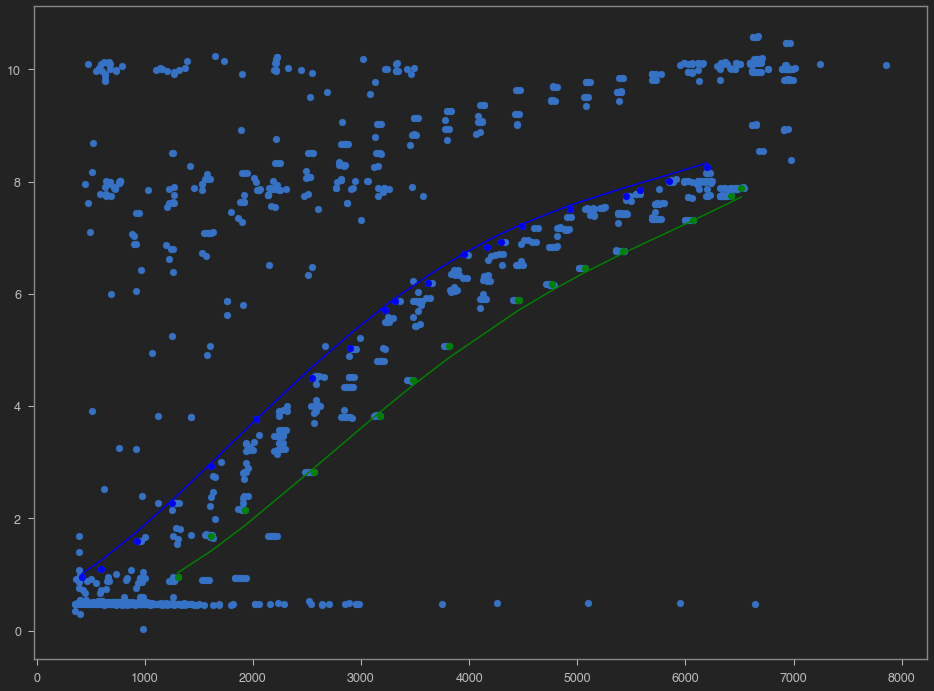

In [21]:
_, ax = plt.subplots(figsize=(16, 12))
ax.scatter(df_sample.Mass, df_sample.RT)

ax.scatter(df_hi.Mass, df_hi.RT, c='blue')
ax.plot(df_hi.Mass, f_hi2(df_hi.Mass), c='blue')

ax.scatter(df_lo.Mass, df_lo.RT, c='green')
ax.plot(df_lo.Mass, f_lo2(df_lo.Mass), c='green')

In [17]:
sample_rt_min = df_sample.RT.min()
sample_rt_max = df_sample.RT.max()

In [18]:
filter_min = 0.5
filter_nums = 5

def bin_range2(df, left, right, f_hi, f_lo, bin_num):
    rt = df.RT
    if rt.empty:
        return 0.0, 0.0
#     rt_min = rt.min()
#     rt_max = rt.max()
    rt_min = f_lo(left)
    rt_min = sample_rt_min if rt_min < sample_rt_min else rt_min
    rt_max = f_hi(right)
    rt_max = sample_rt_max if rt_max > sample_rt_max else rt_max
    rt_height = rt_max - rt_min
#     print(rt_min, rt_max, rt_height)
    
    bin_size = rt_height / filter_nums
    bin_size = filter_min if bin_size < filter_min else bin_size
    
    rt_hi = rt_max - bin_size * (bin_num - 1)
    rt_lo = rt_hi - bin_size
#     print(type(rt_lo), type(bin_size))
    if np.less(rt_lo, rt_min):
        print('Reach the last bin.')
        rt_lo = rt_min
        rt_hi = rt_lo + bin_size
    print('df_win count {} winRT {}-{} filterRT lo-hi {}-{}'.format(df.shape[0], rt_min, rt_max, rt_lo, rt_hi))
    return rt_lo, rt_hi

In [19]:
def create_rectangle(left, right, lo, hi):
    rect = patches.Rectangle((left, lo), right-left, hi-lo)
    return rect

Reach the last bin.
df_win count 29 winRT 0.09-1.108433727284579 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 23 winRT 0.09-1.1275407127403752 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 20 winRT 0.09-1.1466451577265857 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 25 winRT 0.09-1.165746888754874 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 22 winRT 0.09-1.1848457328135003 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 23 winRT 0.09-1.2039415173673216 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 26 winRT 0.09-1.2230340703577927 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 27 winRT 0.09-1.242123220202965 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 21 winRT 0.09-1.2612087957974882 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 23 winRT 0.09-1.2802906265126082 filterRT lo-hi 0.09-0.59
Reach the last bin.
df_win count 19 winRT 0.09-1.2993685421961685 filterRT lo-hi 0.09-0.59
Re

df_win count 12 winRT 0.19013399219748414-3.5668006141412483 filterRT lo-hi 1.54080064097499-2.216133965363743
df_win count 11 winRT 0.21973433284277152-3.5842295190974953 filterRT lo-hi 1.5655324073446613-2.238431444595606
df_win count 13 winRT 0.24923360623457888-3.6016369932058208 filterRT lo-hi 1.5901949610230754-2.260675638417324
df_win count 15 winRT 0.278632116802196-3.6190229263653184 filterRT lo-hi 1.614788440627445-2.2828666025400697
df_win count 5 winRT 0.3079301684968462-3.63638720895168 filterRT lo-hi 1.6393129846787795-2.3050043927697463
df_win count 18 winRT 0.33712806479168445-3.6537297318171955 filterRT lo-hi 1.6637687316018885-2.327089065006991
df_win count 4 winRT 0.36622610868180916-3.671050386290751 filterRT lo-hi 1.6881558197253859-2.3491206752471743
df_win count 12 winRT 0.3952246026842451-3.68834906417783 filterRT lo-hi 1.7124743872816788-2.371099279580396
df_win count 5 winRT 0.42412384883796117-3.7056256577605127 filterRT lo-hi 1.7367245724069815-2.39302493419

df_win count 3 winRT 3.461462838139043-5.742749462944993 filterRT lo-hi 4.242749462944993-4.742749462944993
df_win count 1 winRT 3.479725224941873-5.75635224660204 filterRT lo-hi 4.25635224660204-4.75635224660204
df_win count 12 winRT 3.4979242750475126-5.769922866429373 filterRT lo-hi 4.269922866429373-4.769922866429373
df_win count 5 winRT 3.5160602264343104-5.783461278573104 filterRT lo-hi 4.283461278573104-4.783461278573104
df_win count 12 winRT 3.5341333166025524-5.796967439655939 filterRT lo-hi 4.296967439655939-4.796967439655939
df_win count 4 winRT 3.5521437825744626-5.810441306777181 filterRT lo-hi 4.310441306777181-4.810441306777181
df_win count 6 winRT 3.570091860894196-5.823882837512735 filterRT lo-hi 4.323882837512735-4.823882837512735
df_win count 6 winRT 3.587977787627849-5.837291989915096 filterRT lo-hi 4.337291989915096-4.837291989915096
df_win count 8 winRT 3.6058017983634545-5.850668722513363 filterRT lo-hi 4.350668722513363-4.850668722513363
df_win count 11 winRT 3.

df_win count 11 winRT 5.558255763422837-7.365958932674939 filterRT lo-hi 5.865958932674939-6.365958932674939
df_win count 6 winRT 5.569580919201753-7.374677300256995 filterRT lo-hi 5.874677300256995-6.374677300256995
df_win count 12 winRT 5.58087225415316-7.383362120870367 filterRT lo-hi 5.883362120870367-6.383362120870367
df_win count 5 winRT 5.592129936936082-7.392013419767765 filterRT lo-hi 5.892013419767765-6.392013419767765
df_win count 10 winRT 5.603354135731486-7.400631222678491 filterRT lo-hi 5.900631222678491-6.400631222678491
df_win count 11 winRT 5.614545018242268-7.409215555808451 filterRT lo-hi 5.909215555808451-6.409215555808451
df_win count 5 winRT 5.625702751693275-7.4177664458401456 filterRT lo-hi 5.9177664458401456-6.4177664458401456
df_win count 5 winRT 5.636827502831263-7.426283919932669 filterRT lo-hi 5.926283919932669-6.426283919932669
df_win count 10 winRT 5.6479194379249495-7.434768005721719 filterRT lo-hi 5.934768005721719-6.434768005721719
df_win count 3 winRT

Reach the last bin.
df_win count 5 winRT 6.744191850571099-8.198584089040171 filterRT lo-hi 6.744191850571099-7.244191850571099
Reach the last bin.
df_win count 2 winRT 6.7524778209660745-8.203509878876407 filterRT lo-hi 6.7524778209660745-7.2524778209660745
Reach the last bin.
df_win count 7 winRT 6.760747128677721-8.208408803736123 filterRT lo-hi 6.760747128677721-7.260747128677721
Reach the last bin.
df_win count 2 winRT 6.768999883563165-8.213280947493494 filterRT lo-hi 6.768999883563165-7.268999883563165
Reach the last bin.
df_win count 10 winRT 6.777236195001461-8.218126394499281 filterRT lo-hi 6.777236195001461-7.277236195001461
Reach the last bin.
df_win count 6 winRT 6.785456171893589-8.222945229580848 filterRT lo-hi 6.785456171893589-7.285456171893589
Reach the last bin.
df_win count 3 winRT 6.793659922662499-8.22773753804215 filterRT lo-hi 6.793659922662499-7.293659922662499
Reach the last bin.
df_win count 4 winRT 6.801847555253044-8.232503405663753 filterRT lo-hi 6.8018475

Reach the last bin.
df_win count 5 winRT 7.3042519513772-8.490066651114365 filterRT lo-hi 7.3042519513772-7.8042519513772
Reach the last bin.
df_win count 3 winRT 7.311590491620372-8.493300969273541 filterRT lo-hi 7.311590491620372-7.811590491620372
Reach the last bin.
df_win count 1 winRT 7.3189190569606275-8.49651567957881 filterRT lo-hi 7.3189190569606275-7.8189190569606275
Reach the last bin.
df_win count 3 winRT 7.326237722834456-8.49971090021935 filterRT lo-hi 7.326237722834456-7.826237722834456
Reach the last bin.
df_win count 6 winRT 7.333546564200287-8.502886749860922 filterRT lo-hi 7.333546564200287-7.833546564200287
Reach the last bin.
df_win count 4 winRT 7.340845655538487-8.506043347645889 filterRT lo-hi 7.340845655538487-7.840845655538487
Reach the last bin.
df_win count 2 winRT 7.348135070851345-8.509180813193213 filterRT lo-hi 7.348135070851345-7.848135070851345
Reach the last bin.
df_win count 3 winRT 7.355414883663109-8.51229926659845 filterRT lo-hi 7.355414883663109-

Reach the last bin.
df_win count 3 winRT 7.790749238438931-8.673839000927192 filterRT lo-hi 7.790749238438931-8.29074923843893
Reach the last bin.
df_win count 5 winRT 7.797551436691666-8.676022619792043 filterRT lo-hi 7.797551436691666-8.297551436691666
Reach the last bin.
df_win count 4 winRT 7.804347743620646-8.678195903952737 filterRT lo-hi 7.804347743620646-8.304347743620646
Reach the last bin.
df_win count 3 winRT 7.817922852829469-8.682512072935737 filterRT lo-hi 7.817922852829469-8.317922852829469
Reach the last bin.
df_win count 3 winRT 7.824701738575229-8.68465526133659 filterRT lo-hi 7.824701738575229-8.324701738575229
Reach the last bin.
df_win count 1 winRT 7.898900353585969-8.707622207323709 filterRT lo-hi 7.898900353585969-8.398900353585969
Reach the last bin.
df_win count 1 winRT 7.905613116949308-8.70965886674172 filterRT lo-hi 7.905613116949308-8.405613116949308
Reach the last bin.
df_win count 1 winRT 7.925719928821927-8.715722318337347 filterRT lo-hi 7.9257199288219

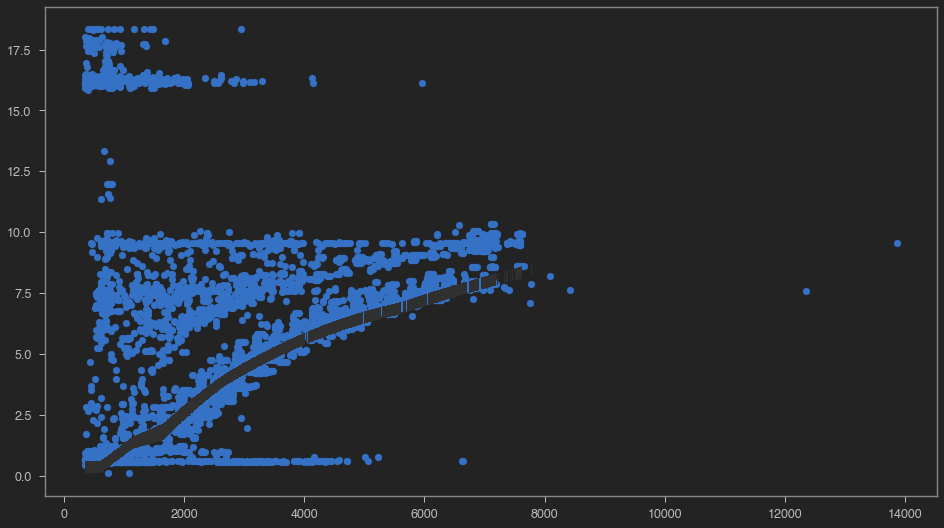

In [49]:
cursor = 0
mass_win_size = 10
bin_num = 3
last_rt_lo = 0.0

# plt.figure(figsize=(16, 9))
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.scatter(df.Mass, df.RT)
filters = list()
while cursor < df_sample.Mass.max():
    # do sth
#     print('processing win {}-{}'.format(cursor, cursor+mass_win_size))
    df_win = df[(df.Mass >= cursor) & (df.Mass < cursor + mass_win_size)]
    rt_lo, rt_hi = bin_range2(df_win, cursor, cursor+mass_win_size, f_hi2, f_lo2, bin_num)
    if rt_lo < last_rt_lo:
        rt_lo = last_rt_lo
        if rt_lo >= rt_hi:
            cursor += mass_win_size
            continue
            
    if np.isclose(rt_lo, 0.0) or np.isclose(rt_hi, 0.0):
        cursor += mass_win_size
        continue
    
    rect = create_rectangle(cursor, cursor+mass_win_size, rt_lo, rt_hi)
    ax.add_patch(rect)
    
    last_rt_lo = rt_lo
    df_filter = df_win[(df_win.RT>=rt_lo) & (df_win.RT<=rt_hi)]
#     print(cursor, df_filter.shape)
    filters.append(df_filter)
    cursor += mass_win_size

plt.show()

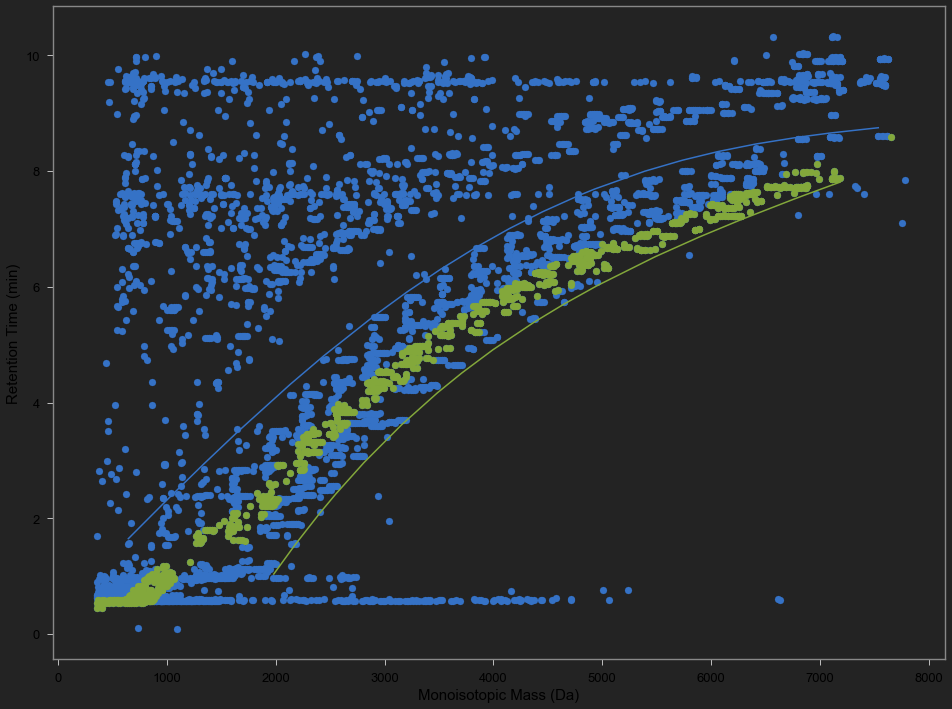

In [50]:
df_filters = pd.concat(filters)
plt = plot_zones(df_sample, df_filters)
plt.plot(df_hi.Mass, f_hi2(df_hi.Mass))
plt.plot(df_lo.Mass, f_lo2(df_lo.Mass))
plt.savefig('/Users/bryan/Documents/Presentations/Jan 12 2021/{}/filter_{}_bin_{}_filters_{}.png'.format('mix5', filter_min, bin_num, filter_nums), transparent=True)

mass_x (1213,) mass_y (1213,)
df3_idxs 234 df5_idxs 242
df3_idxs 149 df5_idxs 146
df3_idxs 182 df5_idxs 174
df3_idxs 224 df5_idxs 240
df3_idxs 22 df5_idxs 20
df3_idxs 72 df5_idxs 75
df3_idxs 43 df5_idxs 42
df3_idxs 48 df5_idxs 49


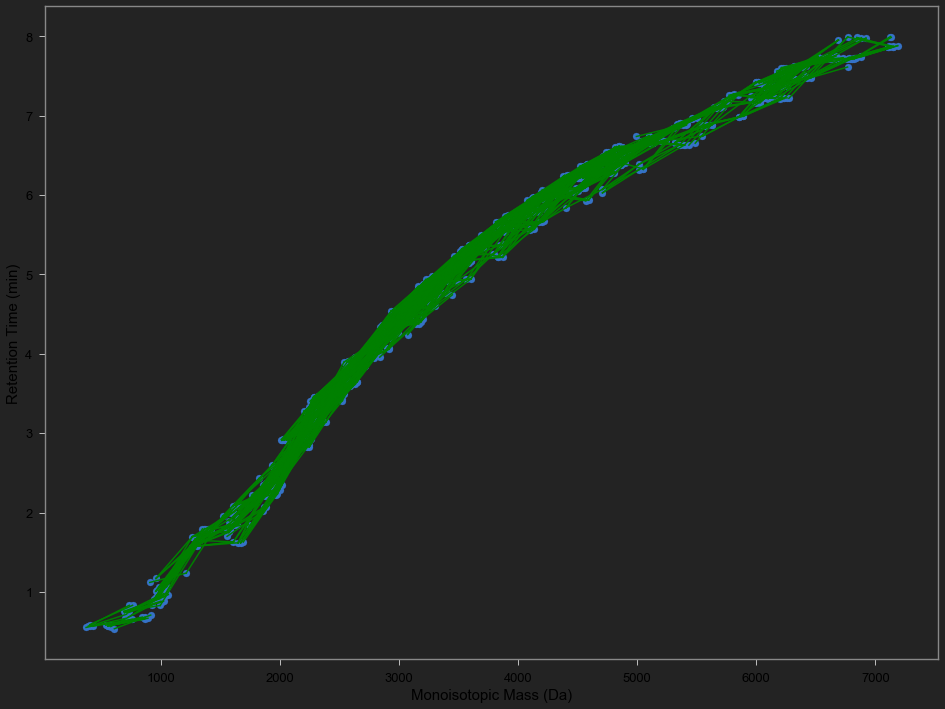

In [51]:
bcr_5p = base_calling_random(df_filters)
plt, _ = plot_basecalling(*bcr_5p, annotate=False)
plt.savefig('/Users/bryan/Documents/Presentations/Jan 12 2021/{}/filter_bc_{}_bin_{}_filters_{}.png'.format('mix5', filter_min, bin_num, filter_nums), transparent=True)

In [45]:
G = nx.DiGraph()

df_bcr = bcr_5p[0]
mass_pairs = bcr_5p[1]
for t in mass_pairs:
    G.add_edge(t[1], t[0], base=t[-1])

path = longest_path(G)
seqs = [G.edges[path[i], path[i+1]]['base'] for i in range(len(path)-1)]
print('longest sequence: ' + ''.join(seqs))
print(path)

longest sequence: CCGUUACCAUAGTUAgU
[1005.162, 1310.2042, 1615.2449, 1960.2913, 2266.3152, 2572.339, 2901.389, 3206.4282, 3511.4677, 3840.5168, 4146.5413, 4475.553, 4820.5896, 5140.5846, 5446.6335, 5775.6554, 6134.7597, 6440.7692]


In [24]:
def longest_path(G):
    dist = {} # stores [node, distance] pair
    for node in nx.topological_sort(G):
        # pairs of dist,node for all incoming edges
        pairs = [(dist[v][0]+1,v) for v in G.pred[node]] 
        if pairs:
            dist[node] = max(pairs)
        else:
            dist[node] = (0, node)
    node,(length,_)  = max(dist.items(), key=lambda x:x[1])
    path = []
    while length > 0:
        path.append(node)
        length,node = dist[node]
    return list(reversed(path))

# Mass Sum

In [87]:
df_src = df_sample.sort_values('Vol', ascending=False)[:2000]

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

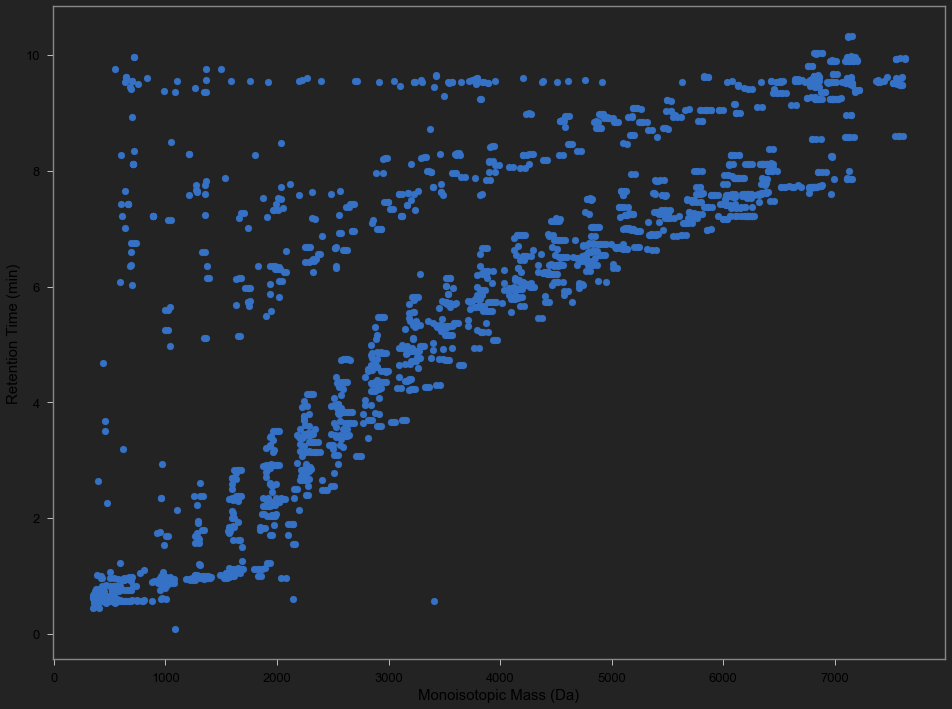

In [88]:
plot_zone(df_src)

In [91]:
full_mass = 6781.0694
df_3p_cca, df_5p_cca = computational_data_seperation(df_src, df_src, full_mass, ignore_endpoints=False, tag=694.2397)

df3 183 df5 183
6024.8403
end5p_idxs Int64Index([650, 651], dtype='int64')
df5p_endpoints Mass     6024.85
RT         7.575
Vol     32082504
Name: 650, dtype: object


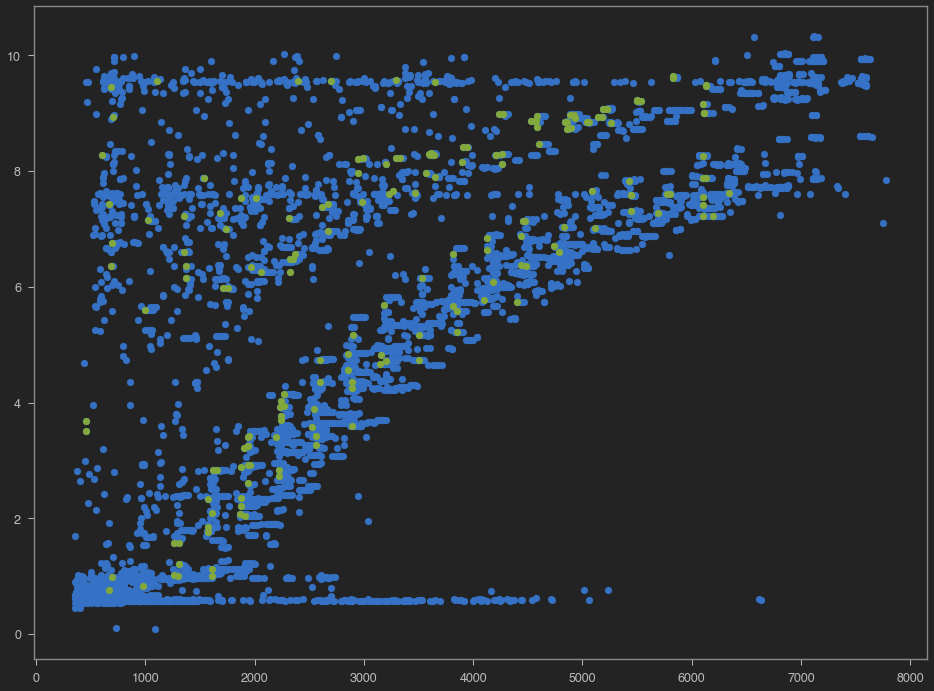

In [92]:
plt.figure(figsize=(16, 12))
plt.scatter(df_sample.Mass, df_sample.RT)
plt.scatter(df_3p_cca.Mass, df_3p_cca.RT)

In [83]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

# df_sample = df[df.Mass < 20000]
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

In [81]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(1768, 26)

In [82]:
# df_3p = df_chosen
df_5p = df_chosen

In [93]:
full_mass = 7088.0855 #7079.0852 #6781.0694
df_3p_cca, df_5p_cca = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True, tag=694.2397)

df3 12 df5 11


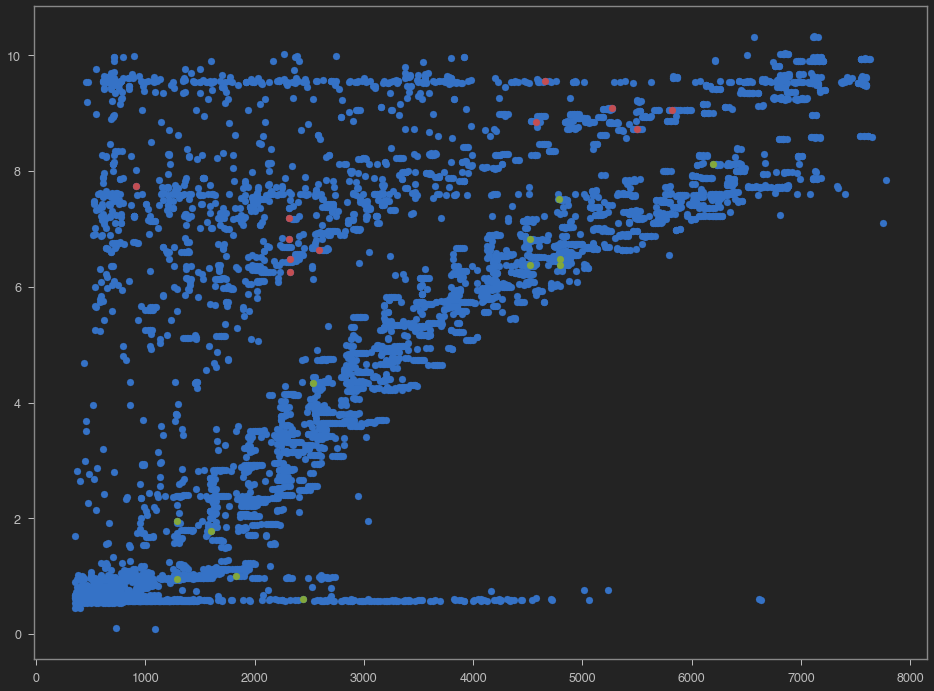

In [94]:
plt.figure(figsize=(16, 12))
plt.scatter(df_sample.Mass, df_sample.RT)
plt.scatter(df_3p_cca.Mass, df_3p_cca.RT)
plt.scatter(df_5p_cca.Mass, df_5p_cca.RT)